<h1 style="color: green;">Considerations for time series</h1>
<p>
Data leakage is the introduction of information about the target of a data mining problem,<br>
which should not be legitimately available to mine from.<br>


Data leakage is the creation of unexpected additional information in the training data<br>
allowing a model or machine learning algorithm to make unrealistically good predictions.<br>


Data leakage is the unintentional introduction of predictive information about the target<br>
by the data collection, aggregation and preparation process.<br>

In processing data for the classifier model, the data has not been split to account for<br>
the data timestamp i.e. the data is randomly sampled so there is relatively future data<br>
points in training and testing datasets. This is called data leakage. However since<br>
time series has suspicious performance, it is waved:<br><br>
<strong>
Michael Burry did not have a time series/forcasting model that predicted an imenent<br>
stock market crash in 2008. Instead, Michael stumbled onto data which indicated<br>
a serious problem in the subprime lending, the rest is common sense.</strong><br><br>
<strong>
Back in 2006-2007 no financial forcasting models successfully predicted the crash in 2008:<br> 
they didn't have the data that indicated a serious problem in the underlying assets, subprime lending.</strong><br><br>
<strong>
Forecasting models do well when there is data supporting the trend:<br>
you can see a wave building by the sea side and follow it until it collapses but you can't<br>
predict where and when it will collapse with certainty. Nore where and when the next one will arise<br>
with certainty unless you have multiple detectors beneath the waters.</strong><br><br>
<strong>
But you know in advance that one will arise, eventually.</strong><br><br>
<strong>
So the question, is time series real data science?</strong><br>



</p>

<h1 style="color: green;">Summary</h1>
<p>
In this section the following are accomplished:
<ul>
<li>Creating dummy variables with pd.get_dummies</li>
<li>Split the data into training and testing</li>
<li>Scale the values using StandardScaler</li>
<li>Feature selection removing low variance features</li>
<li>Feature selection removing correlated features</li>
<li>Illustrate the features capacity to distinguish between the target classes </li>
<li>Export data for modelling</li>
</ul>
All of this is done with the raw data extracted in <b>Data Extraction</b>
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# for feature selection
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import SelectByInformationValue
from sklearn.feature_selection import mutual_info_classif

# for scaling and transforming the data
from sklearn.preprocessing import StandardScaler

# for preliminary Visualizing discriminatory power of top features
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

<h1 style="color: green">Import the data</h1>

In [2]:
raw0 = pd.read_csv("../2. Data/homeshopping.csv")
raw0.head()

,Total_Nbr_of_Items,Total_Price,Venue,Payment_Type,Card_Source,Date_diff,Week_day_name,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,...,Clothes_and_shoes_wk_perc,Clothes_and_shoes_exp_receipt,Clothes_and_shoes_exp_wk,Clothes_and_shoes_wk_exp_perc,House_and_kitchen_receipt,House_and_kitchen_wk,House_and_kitchen_wk_perc,House_and_kitchen_exp_receipt,House_and_kitchen_exp_wk,House_and_kitchen_wk_exp_perc
0,1,3.29,eBay,Card,DD,0.0,Friday,3,3,0.333333,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
1,1,10.89,eBay,Card,DD,0.0,Friday,3,3,0.333333,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
2,1,2.98,eBay,Card,DD,0.0,Friday,3,3,0.333333,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
3,1,10.00,Abbey Sports,Card,DB,5.0,Wednesday,4,4,0.250000,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
4,1,5.91,eBay,Card,DD,1.0,Thursday,4,4,0.250000,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0


In [3]:
# Dropping Nbr_trips_per_wk as this feature was used to derive the target
raw0.drop(['Nbr_trips_per_wk'], axis=1, inplace=True)

<h1 style="color: green">Creating dummy variables with pd.get_dummies()</h1>

In [4]:
# Retrieve categorical features for verification
cat_feats = [var for var in raw0.columns if raw0[var].dtype == 'O']
cat_feats

['Venue', 'Payment_Type', 'Card_Source', 'Week_day_name', 'Part_of_day']

In [5]:
raw0.shape

(936, 155)

In [6]:
raw1 = pd.get_dummies(raw0)
raw1

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_items_per_wk,Nbr_items_wk_perc,Expenditure_per_wk,Total_Exp_wk_perc,AVG_exp_item_per_wk,Trips_response_lt_5,hour,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
0,1,3.29,0.0,3,0.333333,17.16,0.191725,5.720000,1,13,...,0,0,0,0,0,1,0,0,0,0
1,1,10.89,0.0,3,0.333333,17.16,0.634615,5.720000,1,11,...,0,0,0,0,0,0,0,0,0,1
2,1,2.98,0.0,3,0.333333,17.16,0.173660,5.720000,1,13,...,0,0,0,0,0,1,0,0,0,0
3,1,10.00,5.0,4,0.250000,28.69,0.348554,7.172500,1,8,...,0,0,0,0,1,0,0,0,0,1
4,1,5.91,1.0,4,0.250000,28.69,0.205995,7.172500,1,12,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1,6.00,5.0,6,0.166667,552.49,0.010860,92.081667,0,17,...,1,0,0,0,0,1,0,0,0,0
932,2,1.60,1.0,6,0.333333,552.49,0.002896,92.081667,0,10,...,0,1,0,0,0,0,0,0,0,1
933,1,6.00,0.0,6,0.166667,552.49,0.010860,92.081667,0,17,...,0,1,0,0,0,1,0,0,0,0
934,2,12.00,7.0,2,1.000000,12.00,1.000000,6.000000,1,17,...,0,1,0,0,0,1,0,0,0,0


In [7]:
#  Note, not dropping one dummy as it is expected that some dummies will be dropped 
# in the preliminary feature selection, after which checks will be done for completeness

dummies = [var for var in raw1.columns if var not in raw0.columns]
dummies

['Venue_Abbey Sports',
 'Venue_Afro supermarket',
 'Venue_Aldi',
 'Venue_Amazon',
 'Venue_Angies Fish Bar',
 'Venue_Apple',
 'Venue_Asda',
 'Venue_B&M',
 'Venue_B&Q',
 'Venue_BP',
 'Venue_Batter days chippy',
 'Venue_Bazaar food store',
 'Venue_Bel foundry',
 'Venue_Blackbird pharmacy',
 'Venue_Bounce mania',
 'Venue_CO-OP',
 'Venue_Clintons cards',
 'Venue_Currys PC World',
 "Venue_Domino's Pizza",
 'Venue_East midlands railway',
 'Venue_EuroGarages',
 'Venue_Europe',
 'Venue_Gregs',
 'Venue_Grill shack',
 'Venue_Jasup superstore',
 'Venue_John Lewis',
 'Venue_KFC',
 'Venue_Laptops with linux',
 'Venue_Laundrette',
 'Venue_Leicester city fc',
 'Venue_Leicester libraries',
 'Venue_Lidl',
 'Venue_LinkedIn',
 'Venue_Londis',
 'Venue_Loughborough Dynamo',
 'Venue_Loughborough Greenfields',
 'Venue_M and J Congo Shop',
 'Venue_Maryland',
 'Venue_Millets',
 'Venue_Mustafa halal',
 'Venue_Namecheap',
 'Venue_National express',
 'Venue_National space centre',
 'Venue_O2 Academy',
 'Venue_Petr

<h1 style="color: green">Train test split</h1>

In [8]:
X_train,X_test, y_train, y_test =\
train_test_split(raw1.drop(['Trips_response_lt_5'], axis=1),
                 raw1.Trips_response_lt_5, 
                 test_size=0.30, 
                 random_state=44)

In [9]:
X_train.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_items_per_wk,Nbr_items_wk_perc,Expenditure_per_wk,Total_Exp_wk_perc,AVG_exp_item_per_wk,hour,Bread,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
82,6,4.82,3.0,29,0.206897,43.67,0.110373,1.505862,8,1,...,0,0,0,1,0,0,0,0,0,1
390,1,1.09,0.0,46,0.021739,165.28,0.006595,3.593043,15,0,...,0,1,0,0,0,1,0,0,0,0
185,12,9.35,4.0,15,0.800000,34.34,0.272277,2.289333,12,1,...,0,0,0,0,1,1,0,0,0,0
157,3,1.65,1.0,43,0.069767,267.74,0.006163,6.226512,15,0,...,0,1,0,0,0,1,0,0,0,0
716,4,7.16,0.0,36,0.111111,70.78,0.101159,1.966111,16,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
X_test.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_items_per_wk,Nbr_items_wk_perc,Expenditure_per_wk,Total_Exp_wk_perc,AVG_exp_item_per_wk,hour,Bread,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
773,12,11.37,0.0,16,0.750000,61.17,0.185875,3.823125,11,0,...,0,0,0,0,0,0,0,0,0,1
742,1,14.98,0.0,28,0.035714,92.69,0.161614,3.310357,10,0,...,1,0,0,0,0,0,0,0,0,1
90,5,10.47,1.0,21,0.238095,31.23,0.335255,1.487143,18,0,...,0,0,0,0,0,0,0,1,0,0
632,12,14.68,2.0,28,0.428571,86.94,0.168852,3.105000,17,0,...,1,0,0,0,0,1,0,0,0,0
418,1,0.55,0.0,33,0.030303,70.48,0.007804,2.135758,15,0,...,0,0,1,0,0,1,0,0,0,0


<h1 style="color: green">Scaling X_train and X_test</h1>

In [11]:
X_scaler = StandardScaler().set_output(transform="pandas")
X_scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [13]:
X_train.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_items_per_wk,Nbr_items_wk_perc,Expenditure_per_wk,Total_Exp_wk_perc,AVG_exp_item_per_wk,hour,Bread,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
82,0.086329,-0.236649,0.487672,-0.295981,0.056179,-0.294171,-0.410729,-0.211435,-1.324821,1.502816,...,-0.483241,-0.326219,-0.393958,2.680951,-0.426978,-0.974374,-0.177471,-0.393958,-0.158238,1.445553
390,-0.816953,-0.320357,-0.516810,0.983922,-0.829325,0.181543,-0.972653,-0.079624,0.450253,-0.530953,...,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777
185,1.170267,-0.134987,0.822500,-1.350020,2.892660,-0.330668,0.465925,-0.161957,-0.310493,1.502816,...,-0.483241,-0.326219,-0.393958,-0.373002,2.342039,1.026300,-0.177471,-0.393958,-0.158238,-0.691777
157,-0.455640,-0.307790,-0.181982,0.758057,-0.599633,0.582345,-0.974993,0.086687,0.450253,-0.530953,...,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777
716,-0.274984,-0.184135,-0.516810,0.231038,-0.401909,-0.188122,-0.460624,-0.182369,0.703836,-0.530953,...,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777


In [14]:
X_test.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_items_per_wk,Nbr_items_wk_perc,Expenditure_per_wk,Total_Exp_wk_perc,AVG_exp_item_per_wk,hour,Bread,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
773,1.170267,-0.089654,-0.516810,-1.274731,2.653538,-0.225714,-0.001911,-0.065094,-0.564075,-0.530953,...,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.177471,-0.393958,-0.158238,1.445553
742,-0.816953,-0.008639,-0.516810,-0.371270,-0.762490,-0.102414,-0.133278,-0.097476,-0.817657,-0.530953,...,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.177471,-0.393958,-0.158238,1.445553
90,-0.094327,-0.109852,-0.181982,-0.898289,0.205385,-0.342833,0.806925,-0.212618,1.211000,-0.530953,...,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.177471,2.538342,-0.158238,-0.691777
632,1.170267,-0.015372,0.152845,-0.371270,1.116325,-0.124907,-0.094086,-0.110445,0.957418,-0.530953,...,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777
418,-0.816953,-0.332476,-0.516810,0.005172,-0.788369,-0.189295,-0.966108,-0.171656,0.450253,-0.530953,...,-0.483241,-0.326219,2.538342,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777


<h1 style="color: green">Feature selection</h1>
<p>
Here we drop features on the basis of:
<ul>
<li>Variance threshold</li>
<li>Correlation</li>
</ul>
Note a final feature selection will be done using hybrid methods, a mixture of embedded and wrapper methods<br>
on the best model coming out of gridsearch.
</p>

In [15]:
# Re-checking for missing values
sum(X_train.isnull().sum()> 0)

0

<h3 style="color: green">Variance threshold</h3>

In [16]:
# dropping features with 96% of the values under one attribute
sel = DropConstantFeatures(
    tol=0.96, 
    variables=None, 
    missing_values='raise'
)

sel.fit(X_train)

DropConstantFeatures(tol=0.96)

In [17]:
len(sel.features_to_drop_)

116

In [18]:
# list of quasi-constant features
feat_to_drop = sel.features_to_drop_
feat_to_drop

['Eating_out',
 'Seasoning',
 'Transport',
 'DIY',
 'Electronics',
 'Tech_and_services',
 'Clothes_and_shoes',
 'House_and_kitchen',
 'Eating_out_receipt',
 'Eating_out_wk_perc',
 'Eating_out_exp_receipt',
 'Eating_out_exp_wk',
 'Eating_out_wk_exp_perc',
 'Seasoning_receipt',
 'Seasoning_wk_perc',
 'Seasoning_exp_receipt',
 'Seasoning_exp_wk',
 'Seasoning_wk_exp_perc',
 'Transport_receipt',
 'Transport_wk_perc',
 'Transport_exp_receipt',
 'Transport_exp_wk',
 'Transport_wk_exp_perc',
 'DIY_receipt',
 'DIY_wk_perc',
 'DIY_exp_receipt',
 'DIY_exp_wk',
 'DIY_wk_exp_perc',
 'Electronics_receipt',
 'Electronics_wk_perc',
 'Electronics_exp_receipt',
 'Electronics_exp_wk',
 'Electronics_wk_exp_perc',
 'Tech_and_services_receipt',
 'Tech_and_services_wk_perc',
 'Tech_and_services_exp_receipt',
 'Tech_and_services_exp_wk',
 'Tech_and_services_wk_exp_perc',
 'Clothes_and_shoes_receipt',
 'Clothes_and_shoes_wk_perc',
 'Clothes_and_shoes_exp_receipt',
 'Clothes_and_shoes_exp_wk',
 'Clothes_and_sho

In [19]:
# Showing the frequencies by attribute of the low variance features
for var in sel.features_to_drop_:
    x = X_train[var].value_counts(normalize=True)
    print(f"{var}\n",x,"\n\n")

Eating_out
 -0.180392     0.960305
 3.294812     0.032061
 10.245221    0.004580
 6.770017     0.003053
Name: Eating_out, dtype: float64 


Seasoning
 -0.150196    0.972519
 2.743280    0.013740
 8.530230    0.010687
 5.636755    0.003053
Name: Seasoning, dtype: float64 


Transport
 -0.094420     0.966412
 0.936329     0.029008
 11.243815    0.003053
 19.489804    0.001527
Name: Transport, dtype: float64 


DIY
 -0.083814     0.966412
 0.723515     0.019847
 1.530843     0.006107
 2.338172     0.003053
 24.136052    0.001527
 3.145501     0.001527
 5.567488     0.001527
Name: DIY, dtype: float64 


Electronics
 -0.082749     0.986260
 3.788723     0.012214
 23.146084    0.001527
Name: Electronics, dtype: float64 


Tech_and_services
 -0.191404    0.963359
 4.823375    0.035115
 9.838154    0.001527
Name: Tech_and_services, dtype: float64 


Clothes_and_shoes
 -0.128214     0.978626
 3.230982     0.012214
 9.949372     0.004580
 6.590177     0.003053
 13.308567    0.001527
Name: Clothe

In [20]:
print(f"Shape before: {X_train.shape}")
# Dropping the quasi-constant features
X_train = sel.transform(X_train)

# Print the shapes to verify the change
f"Shape after: {X_train.shape}"

Shape before: (655, 239)


'Shape after: (655, 123)'

In [21]:
X_train.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_items_per_wk,Nbr_items_wk_perc,Expenditure_per_wk,Total_Exp_wk_perc,AVG_exp_item_per_wk,hour,Bread,...,Week_day_name_Friday,Week_day_name_Monday,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Evening,Part_of_day_Morning
82,0.086329,-0.236649,0.487672,-0.295981,0.056179,-0.294171,-0.410729,-0.211435,-1.324821,1.502816,...,-0.39654,-0.449260,-0.483241,-0.326219,-0.393958,2.680951,-0.426978,-0.974374,-0.393958,1.445553
390,-0.816953,-0.320357,-0.516810,0.983922,-0.829325,0.181543,-0.972653,-0.079624,0.450253,-0.530953,...,-0.39654,-0.449260,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777
185,1.170267,-0.134987,0.822500,-1.350020,2.892660,-0.330668,0.465925,-0.161957,-0.310493,1.502816,...,-0.39654,-0.449260,-0.483241,-0.326219,-0.393958,-0.373002,2.342039,1.026300,-0.393958,-0.691777
157,-0.455640,-0.307790,-0.181982,0.758057,-0.599633,0.582345,-0.974993,0.086687,0.450253,-0.530953,...,-0.39654,-0.449260,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777
716,-0.274984,-0.184135,-0.516810,0.231038,-0.401909,-0.188122,-0.460624,-0.182369,0.703836,-0.530953,...,-0.39654,2.225881,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777


In [22]:
print(f"Shape before: {X_test.shape}")
#  dropping the quasi constant features from X_test
X_test = sel.transform(X_test)

# Print the shapes to verify the change
f"Shape after: {X_test.shape}"

Shape before: (281, 239)


'Shape after: (281, 123)'

In [23]:
X_test.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_items_per_wk,Nbr_items_wk_perc,Expenditure_per_wk,Total_Exp_wk_perc,AVG_exp_item_per_wk,hour,Bread,...,Week_day_name_Friday,Week_day_name_Monday,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Evening,Part_of_day_Morning
773,1.170267,-0.089654,-0.516810,-1.274731,2.653538,-0.225714,-0.001911,-0.065094,-0.564075,-0.530953,...,2.521815,-0.44926,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.393958,1.445553
742,-0.816953,-0.008639,-0.516810,-0.371270,-0.762490,-0.102414,-0.133278,-0.097476,-0.817657,-0.530953,...,-0.396540,-0.44926,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.393958,1.445553
90,-0.094327,-0.109852,-0.181982,-0.898289,0.205385,-0.342833,0.806925,-0.212618,1.211000,-0.530953,...,2.521815,-0.44926,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,2.538342,-0.691777
632,1.170267,-0.015372,0.152845,-0.371270,1.116325,-0.124907,-0.094086,-0.110445,0.957418,-0.530953,...,-0.396540,-0.44926,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777
418,-0.816953,-0.332476,-0.516810,0.005172,-0.788369,-0.189295,-0.966108,-0.171656,0.450253,-0.530953,...,-0.396540,-0.44926,-0.483241,-0.326219,2.538342,-0.373002,-0.426978,1.026300,-0.393958,-0.691777


<h3 style="color: green">Handling correlated features</h3>
Using manual checks for correlations for more control on which feature is removed.

In [24]:
def correlation(dataset, threshold):
    col_corr =  set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
# Retrieving the highly correlated features
x_cor = 0.7
x = correlation(X_train,x_cor)
print("There are: {0} highly correlated features that meet the {1} threshold".format(len(x),x_cor))
x

There are: 59 highly correlated features that meet the 0.7 threshold


{'Bread_exp_receipt',
 'Bread_exp_wk',
 'Bread_receipt',
 'Bread_wk_exp_perc',
 'Bread_wk_perc',
 'Breakfast_exp_receipt',
 'Breakfast_exp_wk',
 'Breakfast_receipt',
 'Breakfast_wk_exp_perc',
 'Breakfast_wk_perc',
 'Card_Source_0',
 'Cooked_meats_exp_receipt',
 'Cooked_meats_exp_wk',
 'Cooked_meats_receipt',
 'Cooked_meats_wk_exp_perc',
 'Cooking_base_exp_wk',
 'Cooking_base_receipt',
 'Cooking_base_wk_exp_perc',
 'Cooking_base_wk_perc',
 'Cosmetics_and_selfcare_exp_wk',
 'Cosmetics_and_selfcare_receipt',
 'Cosmetics_and_selfcare_wk_exp_perc',
 'Cosmetics_and_selfcare_wk_perc',
 'Dairy_produce_exp_receipt',
 'Dairy_produce_exp_wk',
 'Dairy_produce_receipt',
 'Dairy_produce_wk_exp_perc',
 'Dairy_produce_wk_perc',
 'Drinks_exp_receipt',
 'Drinks_receipt',
 'Drinks_wk_exp_perc',
 'Education_exp_receipt',
 'Education_exp_wk',
 'Education_receipt',
 'Education_wk_exp_perc',
 'Fruit_exp_receipt',
 'Fruit_exp_wk',
 'Fruit_receipt',
 'Fruit_wk_exp_perc',
 'Fruit_wk_perc',
 'Nbr_items_wk_perc',

In [26]:
correlations = X_train.corr()

In [27]:
# Checking correlations manually
Venue_Udemy = correlations.Venue_Udemy.nlargest(10).sort_values()
Venue_Udemy

Card_Source_DD           0.205797
Education                0.471498
Education_receipt        0.471498
Education_wk             0.484039
Card_Source_DB           0.546354
Education_wk_exp_perc    0.579208
Education_wk_perc        0.592646
Education_exp_receipt    0.667168
Education_exp_wk         0.732016
Venue_Udemy              1.000000
Name: Venue_Udemy, dtype: float64

In [28]:
drop_correlated = [
    'Bread', 'Bread_receipt','Bread_exp_receipt','Bread_wk_perc','Breakfast_wk_exp_perc','Breakfast_wk_perc',
    'Breakfast','Breakfast_receipt','Breakfast_exp_receipt','Card_Source_0','Cooked_meats',
    'Cooked_meats_receipt','Cooked_meats_exp_receipt','Cooked_meats_wk_perc','Cooking_base_exp_receipt','Cooking_base',
    'Cooking_base_receipt','Cooking_base_wk_exp_perc','Cosmetics_and_selfcare_exp_receipt',
    'Cosmetics_and_selfcare','Cosmetics_and_selfcare_receipt','Cosmetics_and_selfcare_wk_exp_perc',
    'Dairy_produce','Dairy_produce_receipt','Dairy_produce_exp_receipt','Dairy_produce_wk_perc',
    'Drinks_wk_exp_perc','Drinks','Drinks_receipt','Education','Education_exp_receipt','Venue_Udemy',
    'Education_wk_exp_perc','Fruit','Fruit_receipt','Fruit_exp_receipt','Fruit_wk_perc','Vegetables',
    'Vegetables_receipt','Nbr_items_wk_perc','Raw_meats','Raw_meats_receipt','Raw_meats_exp_receipt',
    'Raw_meats_wk_exp_perc','Snacks_exp_receipt','Snacks','Snacks_receipt','Snacks_wk_exp_perc','Vegetables',
    'Vegetables_receipt','Vegetables_exp_receipt','Vegetables_wk_exp_perc'
]

In [29]:
len(drop_correlated)

52

In [30]:
# Dropping correlated features in X_train
X_train.drop(drop_correlated, axis=1, inplace=True)

# Dropping correlated features in X_test
X_test.drop(drop_correlated, axis=1, inplace=True)

In [31]:
# Rechecking correlated features
x_cor = 0.7
x = correlation(X_train,x_cor)
print("There are: {0} highly correlated features that meet the {1} threshold".format(len(x),x_cor))
x

There are: 1 highly correlated features that meet the 0.7 threshold


{'Payment_Type_Cash'}

In [32]:

correlations = X_train.corr()

In [33]:
Payment_Type_Cash = correlations.Payment_Type_Cash.nlargest(10).sort_values()
Payment_Type_Cash

Education_wk                     0.025481
Cosmetics_and_selfcare_exp_wk    0.039521
Week_day_name_Saturday           0.044996
Snacks_wk                        0.053124
Drinks_wk                        0.057420
Part_of_day_Afternoon            0.062380
Cosmetics_and_selfcare_wk        0.100388
Venue_Yours Supermarket          0.117384
Eating_out_wk                    0.166993
Payment_Type_Cash                1.000000
Name: Payment_Type_Cash, dtype: float64

<p>Note Payment_Type_Cash does not have any high correlation other than to itself. </p>

<h1 style="color: green">Visualizing discriminatory power of top features</h1>
Retrieving top features by mutual information gain to illustrate<br>
the discriminatory power of any two features to distinguish between<br>
the attributes of the target feature.

In [34]:
X_train['target'] = y_train.values

In [35]:
mutual_info = mutual_info_classif(X_train.drop(['target'], axis=1),
                                  X_train.target,
                                  random_state=43)

In [36]:
mtI_vars = [var for var in X_train.columns if var != 'target']
mutual_info_series = pd.Series(mutual_info)
mutual_info_series.index = X_train[mtI_vars].columns
mutual_info_series.sort_values(ascending=False)[:10]

AVG_exp_item_per_wk    0.319765
Expenditure_per_wk     0.295565
Drinks_wk              0.160613
Nbr_items_per_wk       0.147100
Total_Exp_wk_perc      0.116290
Eating_out_wk          0.063491
Bread_exp_wk           0.062751
Date_diff              0.060684
Snacks_wk              0.059139
Transport_wk           0.054630
dtype: float64

Text(0.5, 1.0, 'Correlation of top 10 features by Mutual information')

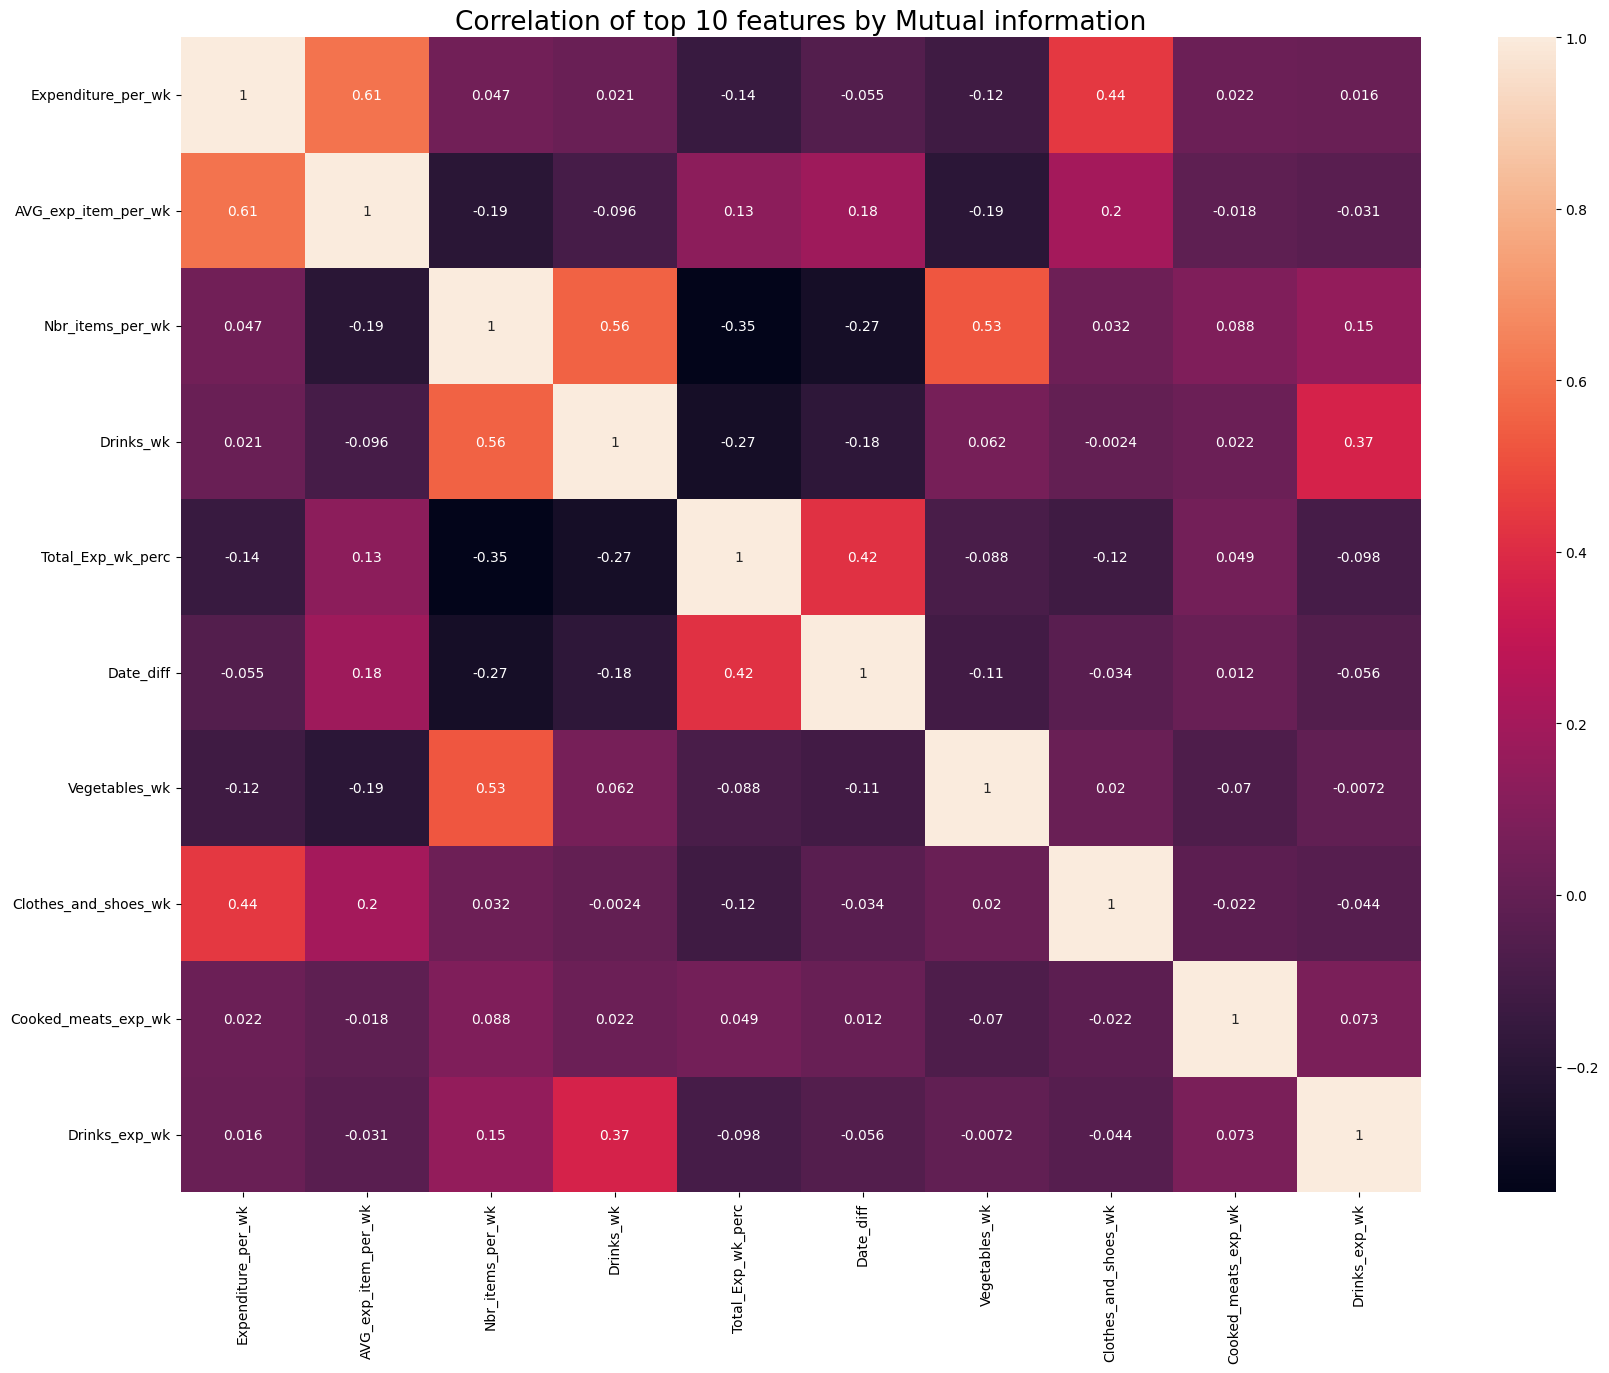

In [37]:
# Checking the correlation between the top 10 features above

corr_heatmap = [
    'Expenditure_per_wk','AVG_exp_item_per_wk','Nbr_items_per_wk','Drinks_wk',
    'Total_Exp_wk_perc','Date_diff','Vegetables_wk','Clothes_and_shoes_wk',
    'Cooked_meats_exp_wk','Drinks_exp_wk'
]

# Plotting the correlation matrix
plt.figure(figsize = (20,15))
sb.heatmap(X_train[corr_heatmap].corr(), annot = True)
plt.title("Correlation of top 10 features by Mutual information", fontsize=19)

In [38]:
# Add the target to X_train for visualization only
X_train_viz = X_train[['Expenditure_per_wk','AVG_exp_item_per_wk','Nbr_items_per_wk','Drinks_wk',
                           'Total_Exp_wk_perc','Date_diff','Vegetables_wk','Clothes_and_shoes_wk',
                           'Cooked_meats_exp_wk','Drinks_exp_wk','target']]

In [39]:
X_train_viz.head()

,Expenditure_per_wk,AVG_exp_item_per_wk,Nbr_items_per_wk,Drinks_wk,Total_Exp_wk_perc,Date_diff,Vegetables_wk,Clothes_and_shoes_wk,Cooked_meats_exp_wk,Drinks_exp_wk,target
82,-0.294171,-0.211435,-0.295981,-0.385237,-0.410729,0.487672,0.170240,-0.336270,-0.356701,-0.065874,0
390,0.181543,-0.079624,0.983922,1.771433,-0.972653,-0.516810,-1.378474,0.810902,-0.356701,2.565826,0
185,-0.330668,-0.161957,-1.350020,-1.104128,0.465925,0.822500,-0.410528,-0.336270,0.096110,-0.464250,1
157,0.582345,0.086687,0.758057,-0.744683,-0.974993,-0.181982,0.170240,-0.336270,-0.356701,-0.464250,0
716,-0.188122,-0.182369,0.231038,-0.385237,-0.460624,-0.516810,0.363830,-0.336270,-0.356701,-0.464250,1


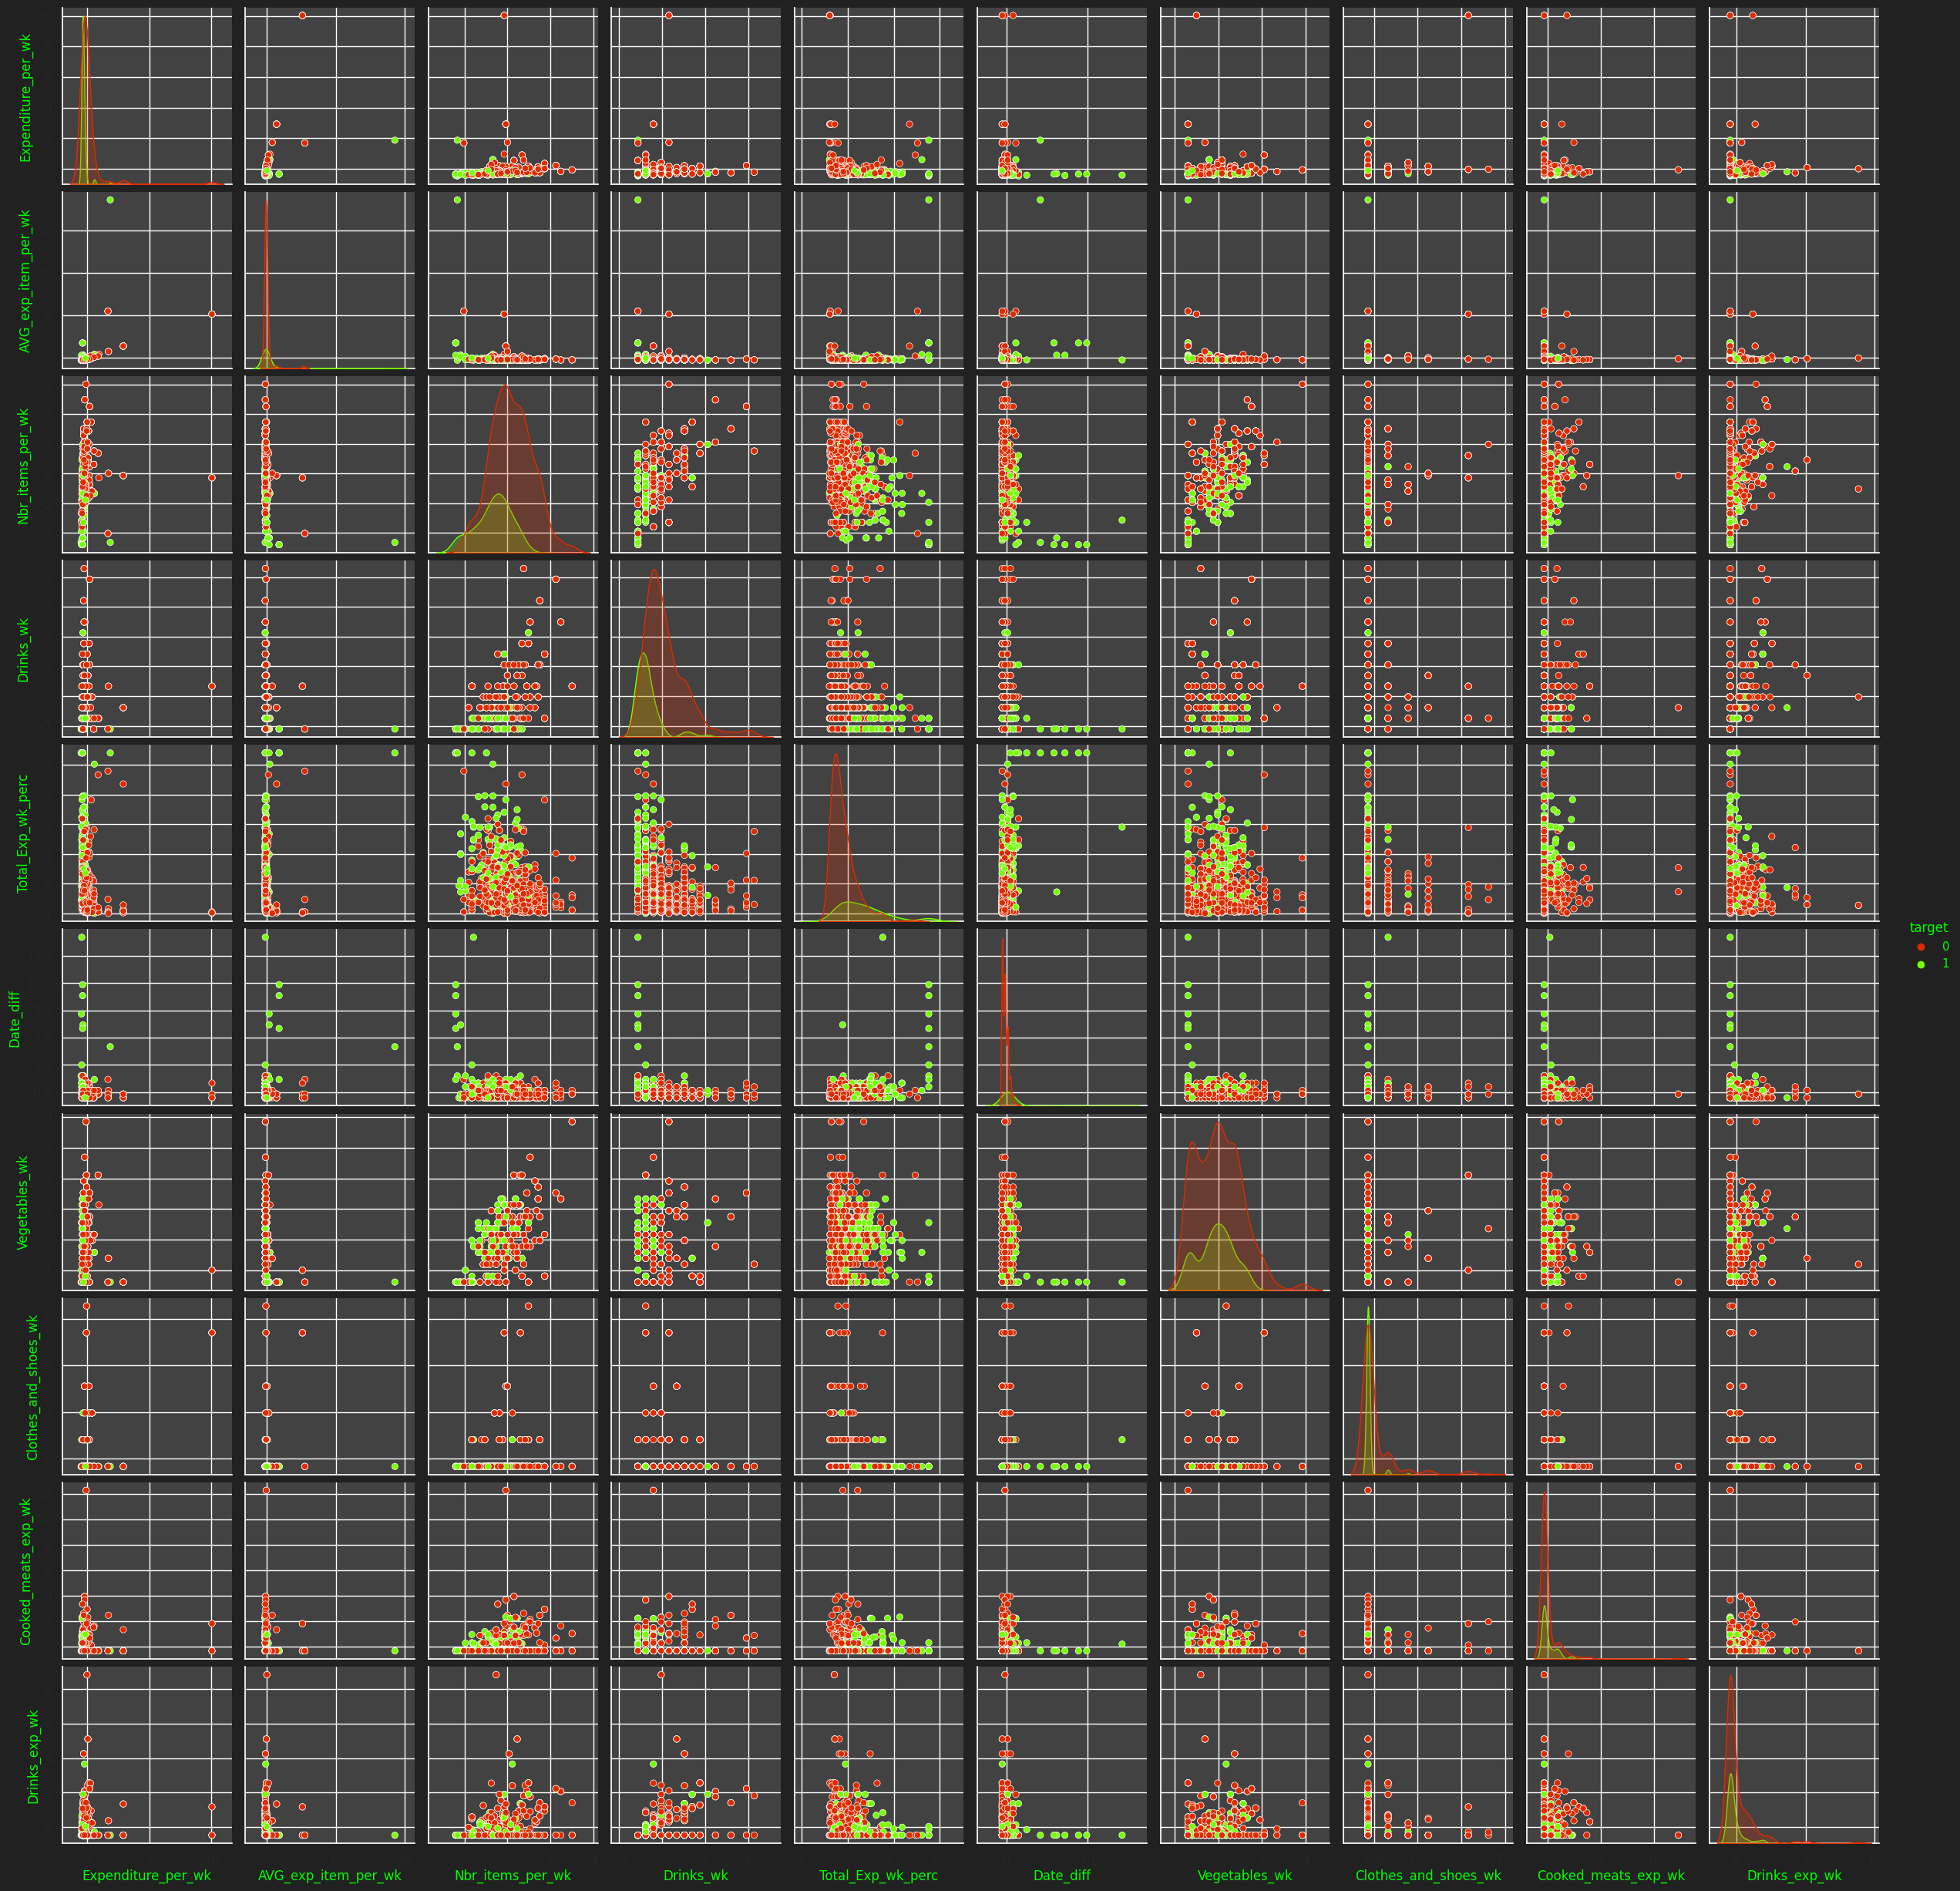

In [40]:
# lets explore the discriminatory power of the top features by info gain in splitting the target
sb.set_style('dark')
sb.set(rc={'axes.facecolor':'#424242',
           'figure.facecolor':'#212121',
           'axes.labelcolor':'lime',
           'text.color':'lime'})

sb.pairplot(X_train_viz, 
            hue='target',
            palette=sb.blend_palette(['#DD2C00','#76FF03'],2))
plt.show()

# please zoom in to see the plot better

<p>
The plots above show how well any two features splits/discriminate the target groupings.<br>
Green dots are the target group of interest, less than 5 shopping trips per week,<br>
red dots are the non target, 5 or more shoppping trips per week.<br>

Plots that discriminate well exhibit clustering amongst the target groups i.e.<br>
clear splits distinguish the boundaries between the groups revealing group behaviour.<br>
While less clear splits don't distinguish well as the boundaries aren't clear.<br>

This is useful insight: it tells us which combination of features have greater predictive<br>
power and which do not.<br>
</p>

<h1 style="color: green;">Export the model data</h1>

In [41]:
X_test['target'] = y_test

In [42]:
X_test.shape, X_train.shape

((281, 74), (655, 74))

In [43]:
X_train.to_csv("../2. Data/homeshopping_classif_X_train.csv",index=False)
X_test.to_csv("../2. Data/homeshopping_classif_X_test.csv",index=False)